In [1]:
# import dependencies
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

import datetime
import matplotlib.pyplot as plt

In [2]:
# reflect database tables (Measurment & Station) into classes
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

session = Session(engine)

In [5]:
# plot last year's worth of precipitation

current_datetime = datetime.datetime.now()
year = datetime.timedelta(days=365)
year_ago = current_datetime - year

recent_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago).all()

prcp_df = pd.DataFrame.from_records(recent_prcp, columns=['Date','Precipitation'])

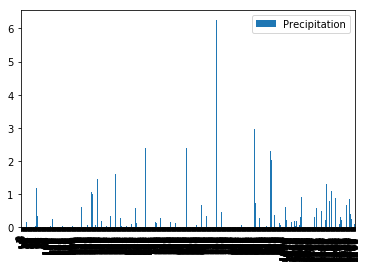

In [8]:
prcp_df.plot(kind='bar')
plt.show()

In [10]:
# summary statistics for precipitation
prcp_df.describe()

,Precipitation
count,1272.000000
mean,0.166958
std,0.453724
min,0.000000
25%,0.000000
50%,0.000000
75%,0.110000
max,6.250000


In [32]:
# query for the total number of stations
station_count = session.query(Station.station).count()
station_count

# query for most active stations
stations_by_activity = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

stations_df = pd.DataFrame.from_records(stations_by_activity, columns=['Station','Observations'])
most_obs = stations_df["Station"][stations_df["Observations"].idxmax()]
most_obs

'USC00519281'

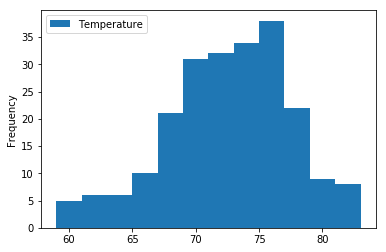

In [41]:
# plot the last 12 months of temperature data from the most active station

recent_temps = session.query(Measurement.station, Measurement.date, Measurement.tobs)\
    .filter(Measurement.date > year_ago).filter(Measurement.station == most_obs).all()
recent_temps_df = pd.DataFrame.from_records(recent_temps, columns=['Station','Date','Temperature'])

recent_temps_df.plot(kind='hist', bins=12)
plt.show()

In [42]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

[(62, 69.3921568627451, 74)]


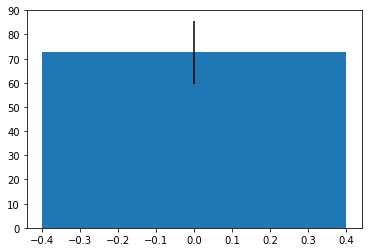

In [63]:
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates 
# from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

trip_start = '2018-03-17'
trip_end = '2018-03-24'

last_year_start = datetime.datetime.strptime(trip_start, '%Y-%m-%d') - year
start_date = last_year_start.strftime('%Y-%m-%d')
last_year_end = datetime.datetime.strptime(trip_end, '%Y-%m-%d') - year
end_date = last_year_end.strftime('%Y-%m-%d')

trip_temps = calc_temps(start_date, end_date)
min_temp, avg_temp, max_temp = trip_temps[0]

plt.bar(0, avg_temp, yerr=max_temp-min_temp)
plt.show()

In [66]:
calc_temps('2017-03-04','2018-01-02')

[(58, 75.69650655021834, 87)]